Loading libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

Loading dataset

In [2]:
df = pd.read_csv('genetic_disorder_classification.csv')

General overview

In [3]:
df_info = df.info()
display(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

None

In [4]:
df_head = df.head(10)
display(df_head)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,PID0x44fe,14.0,Yes,No,Yes,No,5.103188,Richard,NaN,Coleston,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,PID0x28de,3.0,Yes,No,Yes,Yes,4.901080,Mary,NaN,Aydun,...,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,PID0x4f8f,3.0,No,No,Yes,Yes,4.964816,Emma,Bryant,Keng,...,Singular,9.836352,inconclusive,0.0,0.0,1.0,NaN,0.0,Single-gene inheritance diseases,Tay-Sachs
8,PID0x8ce3,11.0,No,No,Yes,No,5.209058,Willie,Camacho,Tr,...,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,PID0x8660,4.0,No,Yes,Yes,Yes,4.752272,John,Sandoval,Gregori,...,Multiple,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [5]:
df_nunique = df.nunique()
display(df_nunique)

Patient Id                                          22083
Patient Age                                            15
Genes in mother's side                                  2
Inherited from father                                   2
Maternal gene                                           2
Paternal gene                                           2
Blood cell count (mcL)                              22083
Patient First Name                                   2524
Family Name                                          6282
Father's name                                       16368
Mother's age                                           34
Father's age                                           45
Institute Name                                         27
Location of Institute                                  26
Status                                                  2
Respiratory Rate (breaths/min)                          2
Heart Rate (rates/min                                   2
Test 1        

Identifying with NaN values

In [6]:
df_nan = df.isna().sum()
display(df_nan)

Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

Visualization of NaN values

<AxesSubplot:>

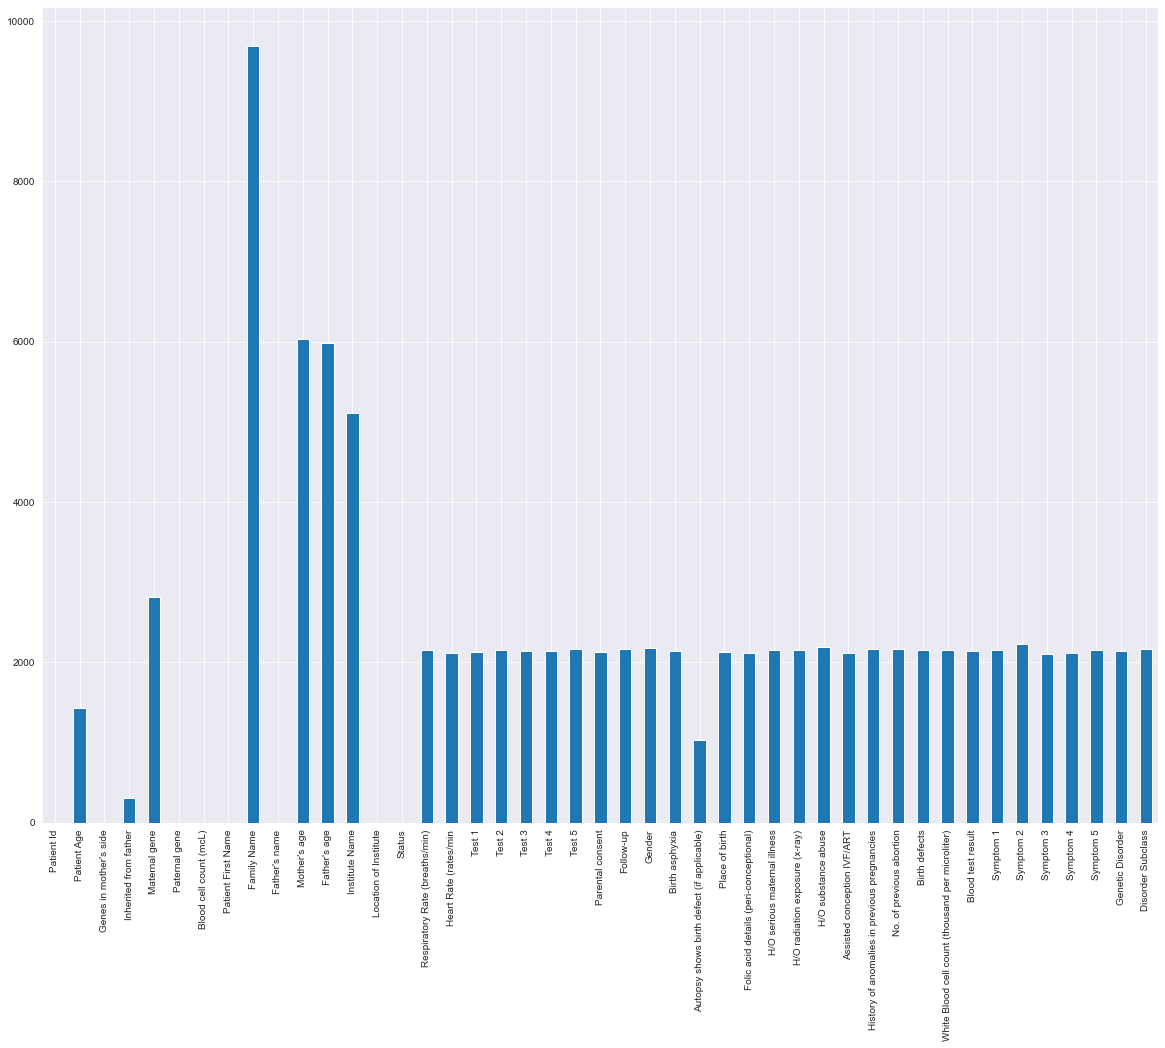

In [7]:
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')
df.isna().sum().plot(kind='bar')

Data cleaning

In [8]:
df.drop(
    ['Family Name', "Father's name", "Mother's age",
     "Father's age", 'Institute Name', 'Location of Institute',
     'Patient First Name', 'Patient Id'], axis = 1, inplace = True
)

In [9]:
df_cat = df.nunique()
for column_name in df:
    if 1 < df_cat[column_name] <= 9:
        df[column_name] = df[column_name].astype('category')
    elif df_cat[column_name] == 1:
        df.drop([column_name], axis = 1, inplace = True)

Visualization of data with float type

<AxesSubplot:xlabel='White Blood cell count (thousand per microliter)'>

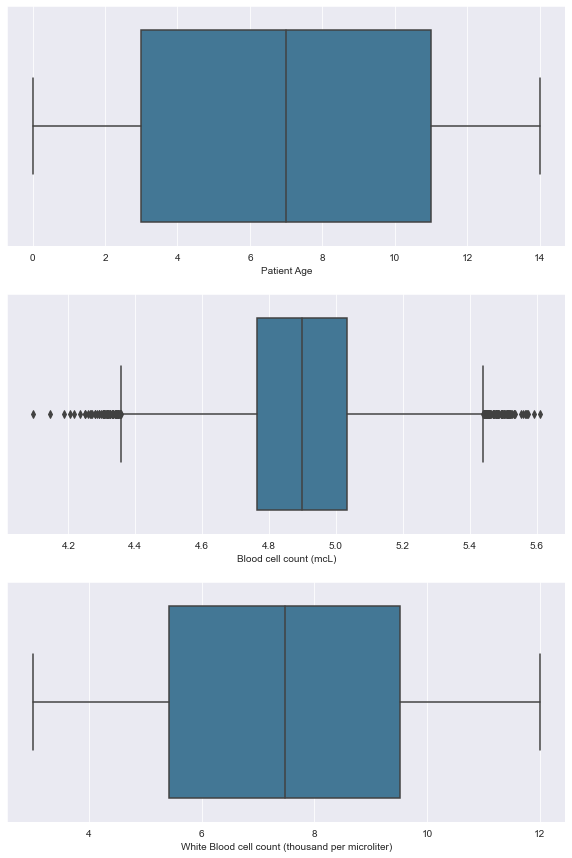

In [10]:
fig, axes = plt.subplots(3, 1, figsize = (10, 15), sharey = True)
sns.set_style('darkgrid')

sns.boxplot(
    data = df, x = 'Patient Age',
    palette = 'mako', ax = axes[0]
)


sns.boxplot(
    data = df, x = 'Blood cell count (mcL)', 
    palette = 'mako', ax = axes[1]
)

sns.boxplot(
    data = df, x = 'White Blood cell count (thousand per microliter)', 
            palette = 'mako', ax = axes[2]
)

General information about float types

In [11]:
column_with_float = ['Patient Age', 
                      'Blood cell count (mcL)', 
                      'White Blood cell count (thousand per microliter)']
df[column_with_float].describe()

,Patient Age,Blood cell count (mcL),White Blood cell count (thousand per microliter)
count,20656.000000,22083.000000,19935.000000
mean,6.974148,4.898871,7.486224
std,4.319475,0.199663,2.653393
min,0.000000,4.092727,3.000000
25%,3.000000,4.763109,5.424703
50%,7.000000,4.899399,7.477132
75%,11.000000,5.033830,9.526152
max,14.000000,5.609829,12.000000


Filling missing data with median

In [12]:
df[column_with_float] = df[column_with_float].fillna(df[column_with_float].median())

Deleting rows with missing category values 

In [13]:
df = df.dropna()

Visualization of target columns

<AxesSubplot:xlabel='Disorder Subclass', ylabel='count'>

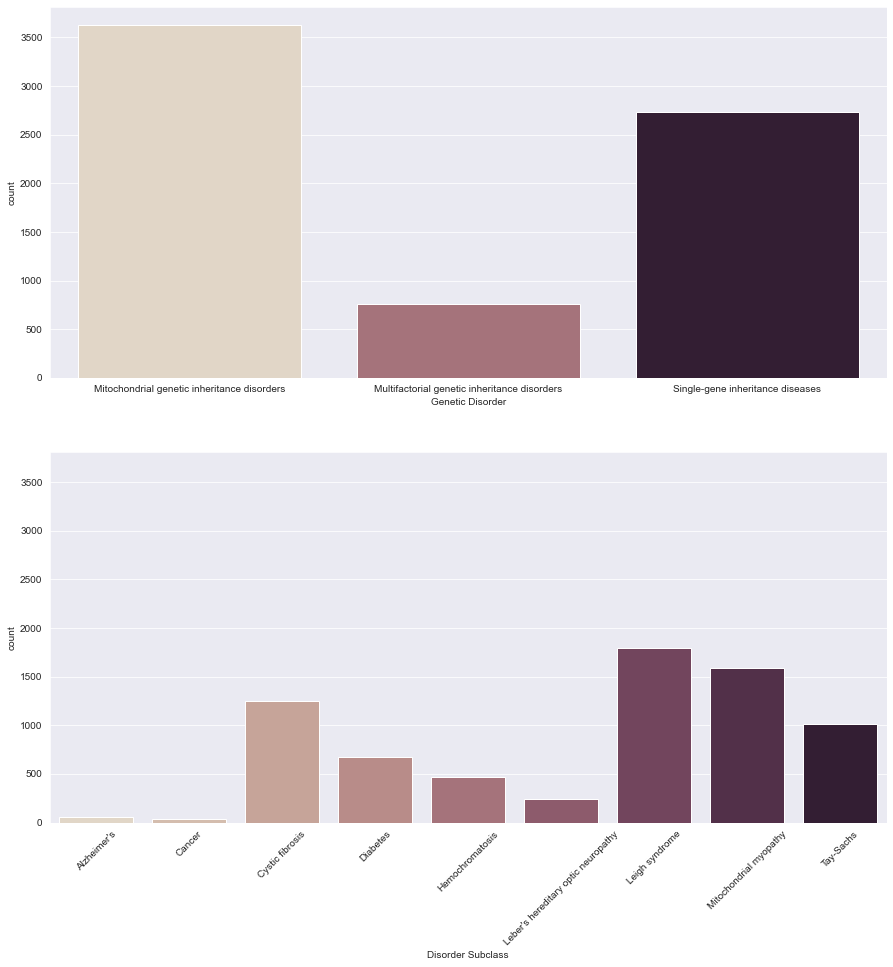

In [14]:
fig, axes = plt.subplots(2, 1, figsize = (15, 15), sharey = True)
sns.set_style('darkgrid')
sns.countplot(
    x = 'Genetic Disorder', palette = "ch:.25", 
    data = df, ax = axes[0]
)
plt.xticks(rotation=45)
sns.countplot(
    x = 'Disorder Subclass', palette = 'ch:.25', 
    data = df, ax = axes[1]
)

<AxesSubplot:xlabel='Disorder Subclass', ylabel='Blood cell count (mcL)'>

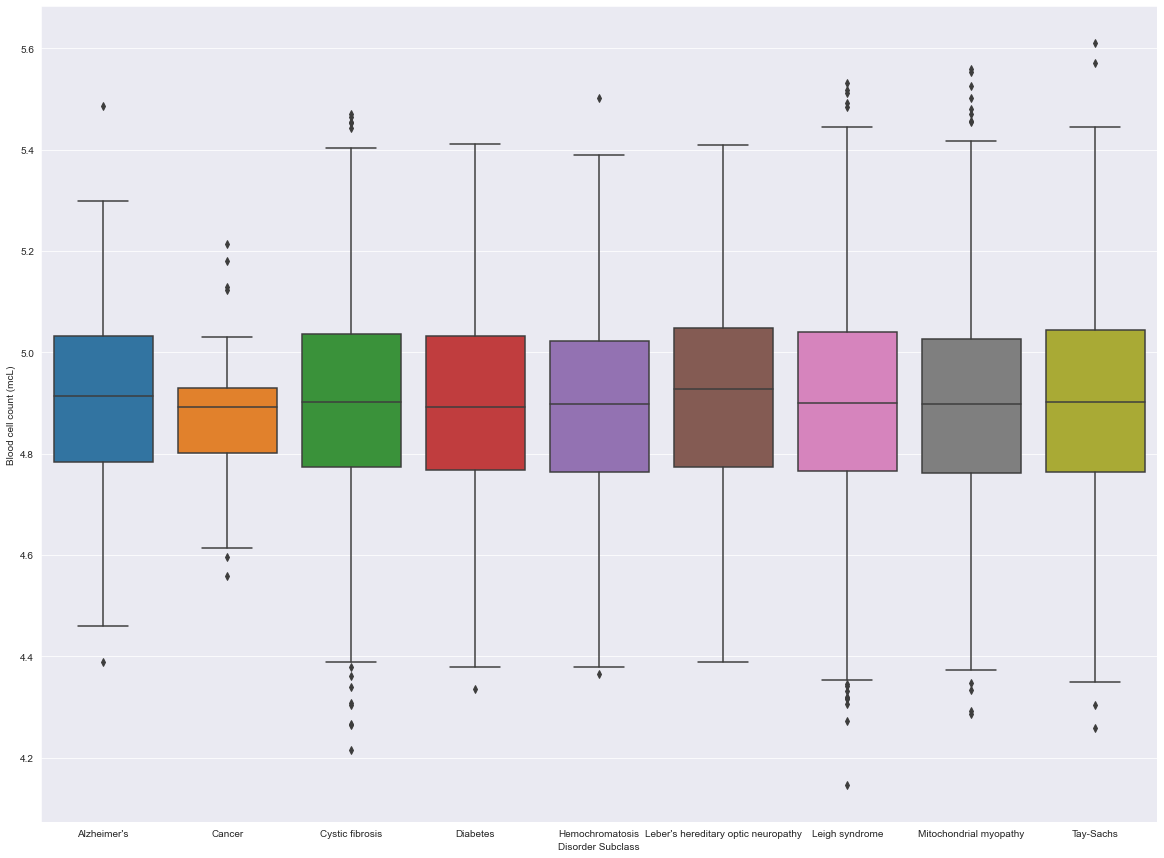

In [15]:
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')
sns.boxplot(
    x = 'Disorder Subclass', y = 'Blood cell count (mcL)', data = df
)

<AxesSubplot:xlabel='Genetic Disorder', ylabel='Blood cell count (mcL)'>

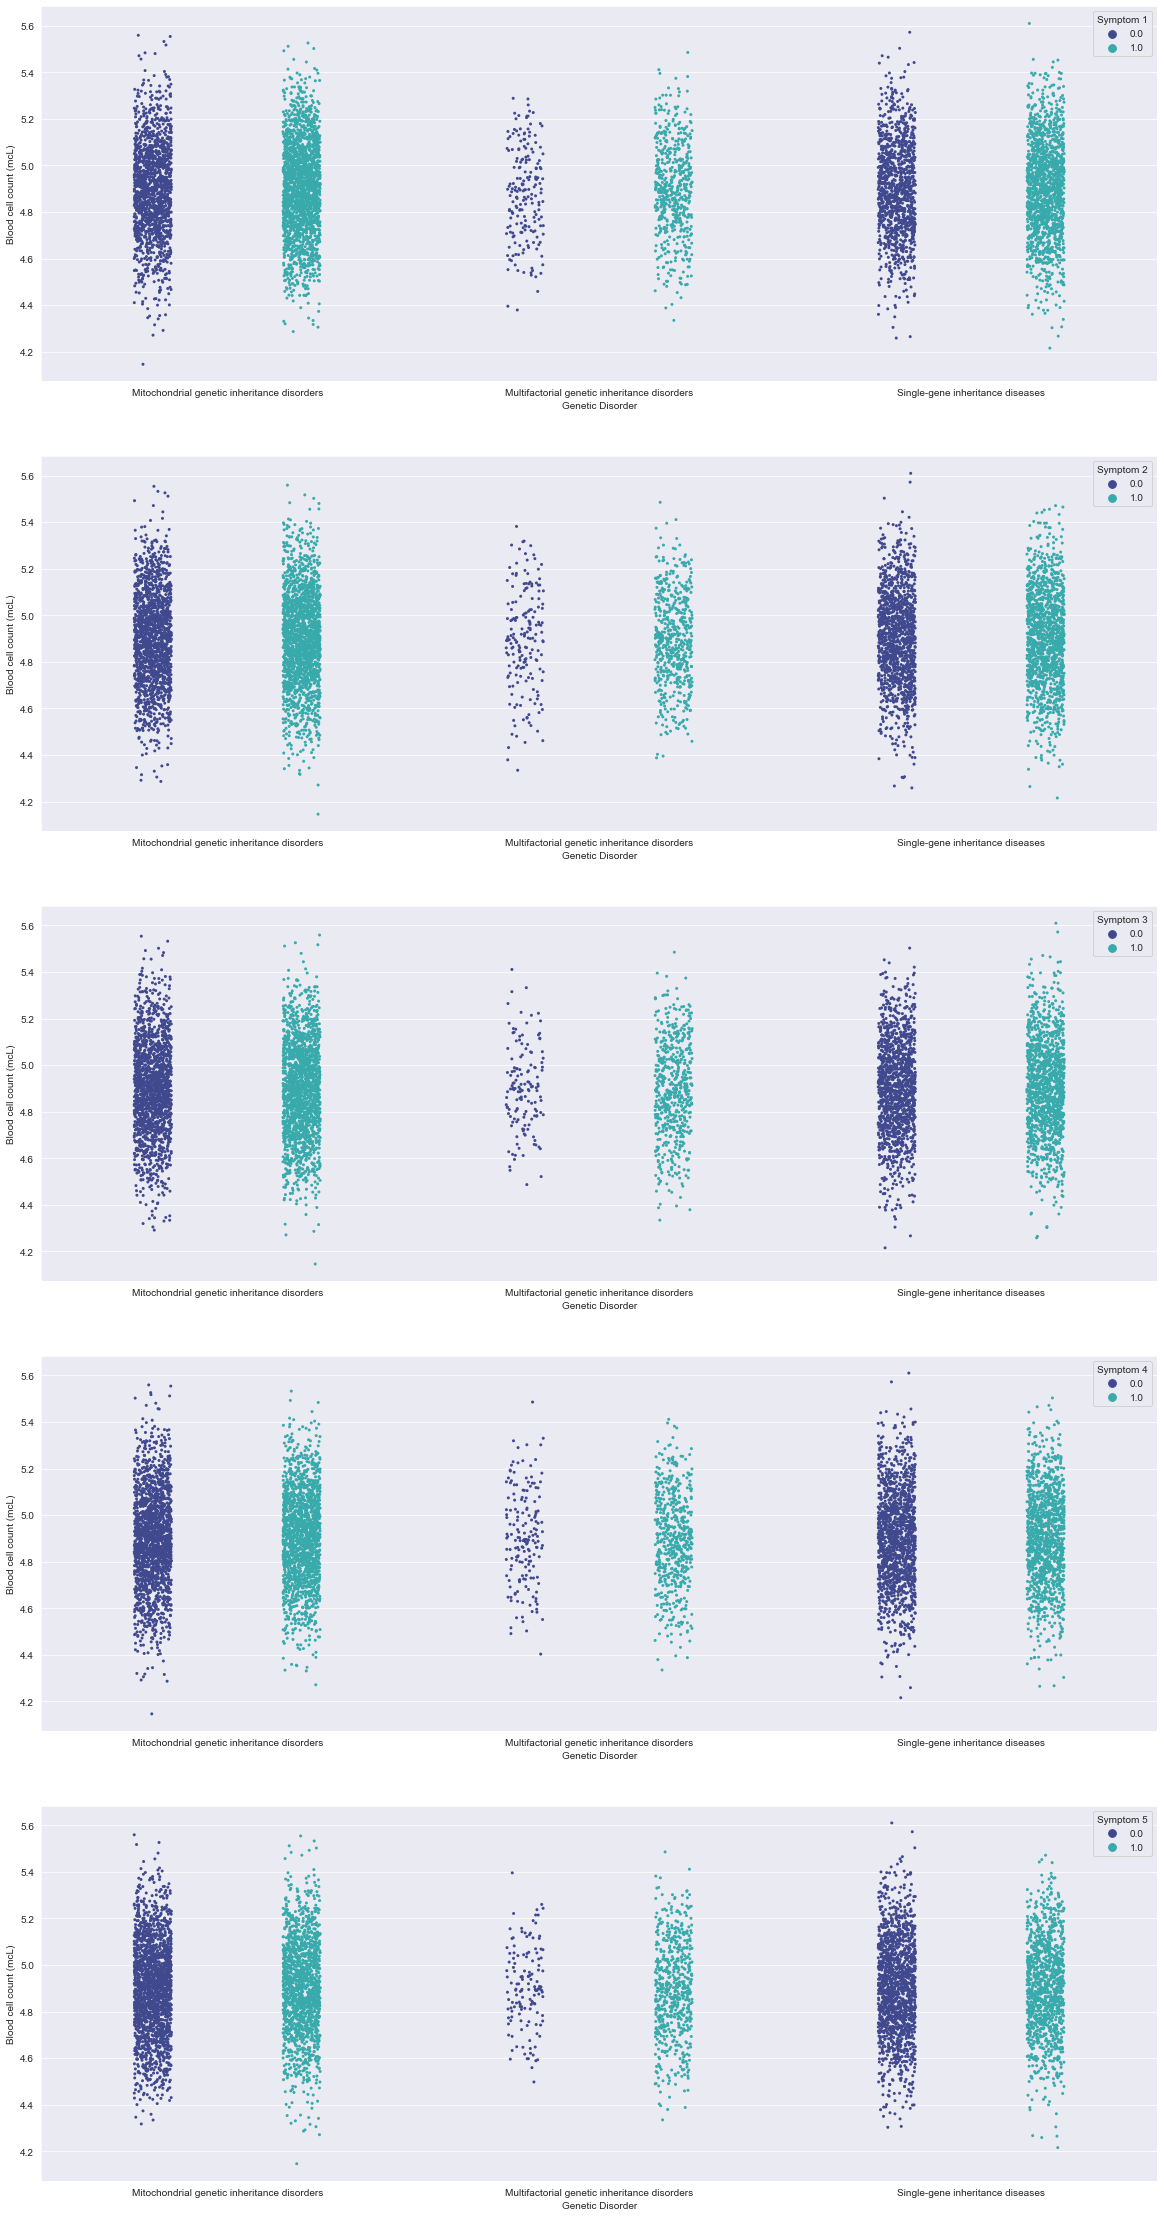

In [16]:
fig, axes = plt.subplots(5, 1, figsize = (20, 40), sharey = True)
sns.set_style('darkgrid')


sns.stripplot(
    x = 'Genetic Disorder', y = 'Blood cell count (mcL)', 
    data = df, palette = 'mako',
    jitter = True, hue = 'Symptom 1', 
    dodge = True, ax = axes[0], size = 3
)

sns.stripplot(
    x = 'Genetic Disorder', y = 'Blood cell count (mcL)', 
    data=df, palette = 'mako',
    jitter = True, hue = 'Symptom 2', 
    dodge = True, ax = axes[1], size = 3
)

sns.stripplot(
    x = 'Genetic Disorder', y = 'Blood cell count (mcL)', 
    data = df, palette = 'mako',
    jitter = True, hue = 'Symptom 3', 
    dodge = True, ax = axes[2], size = 3
)

sns.stripplot(
    x = 'Genetic Disorder', y = 'Blood cell count (mcL)', 
    data = df, palette = 'mako',
    jitter = True, hue = 'Symptom 4', 
    dodge = True, ax = axes[3], size = 3
)

sns.stripplot(
    x = 'Genetic Disorder', y = 'Blood cell count (mcL)', 
    data = df, palette = 'mako',
    jitter = True, hue = 'Symptom 5', 
    dodge = True, ax = axes[4], size = 3
)

<AxesSubplot:xlabel='Disorder Subclass', ylabel='Blood cell count (mcL)'>

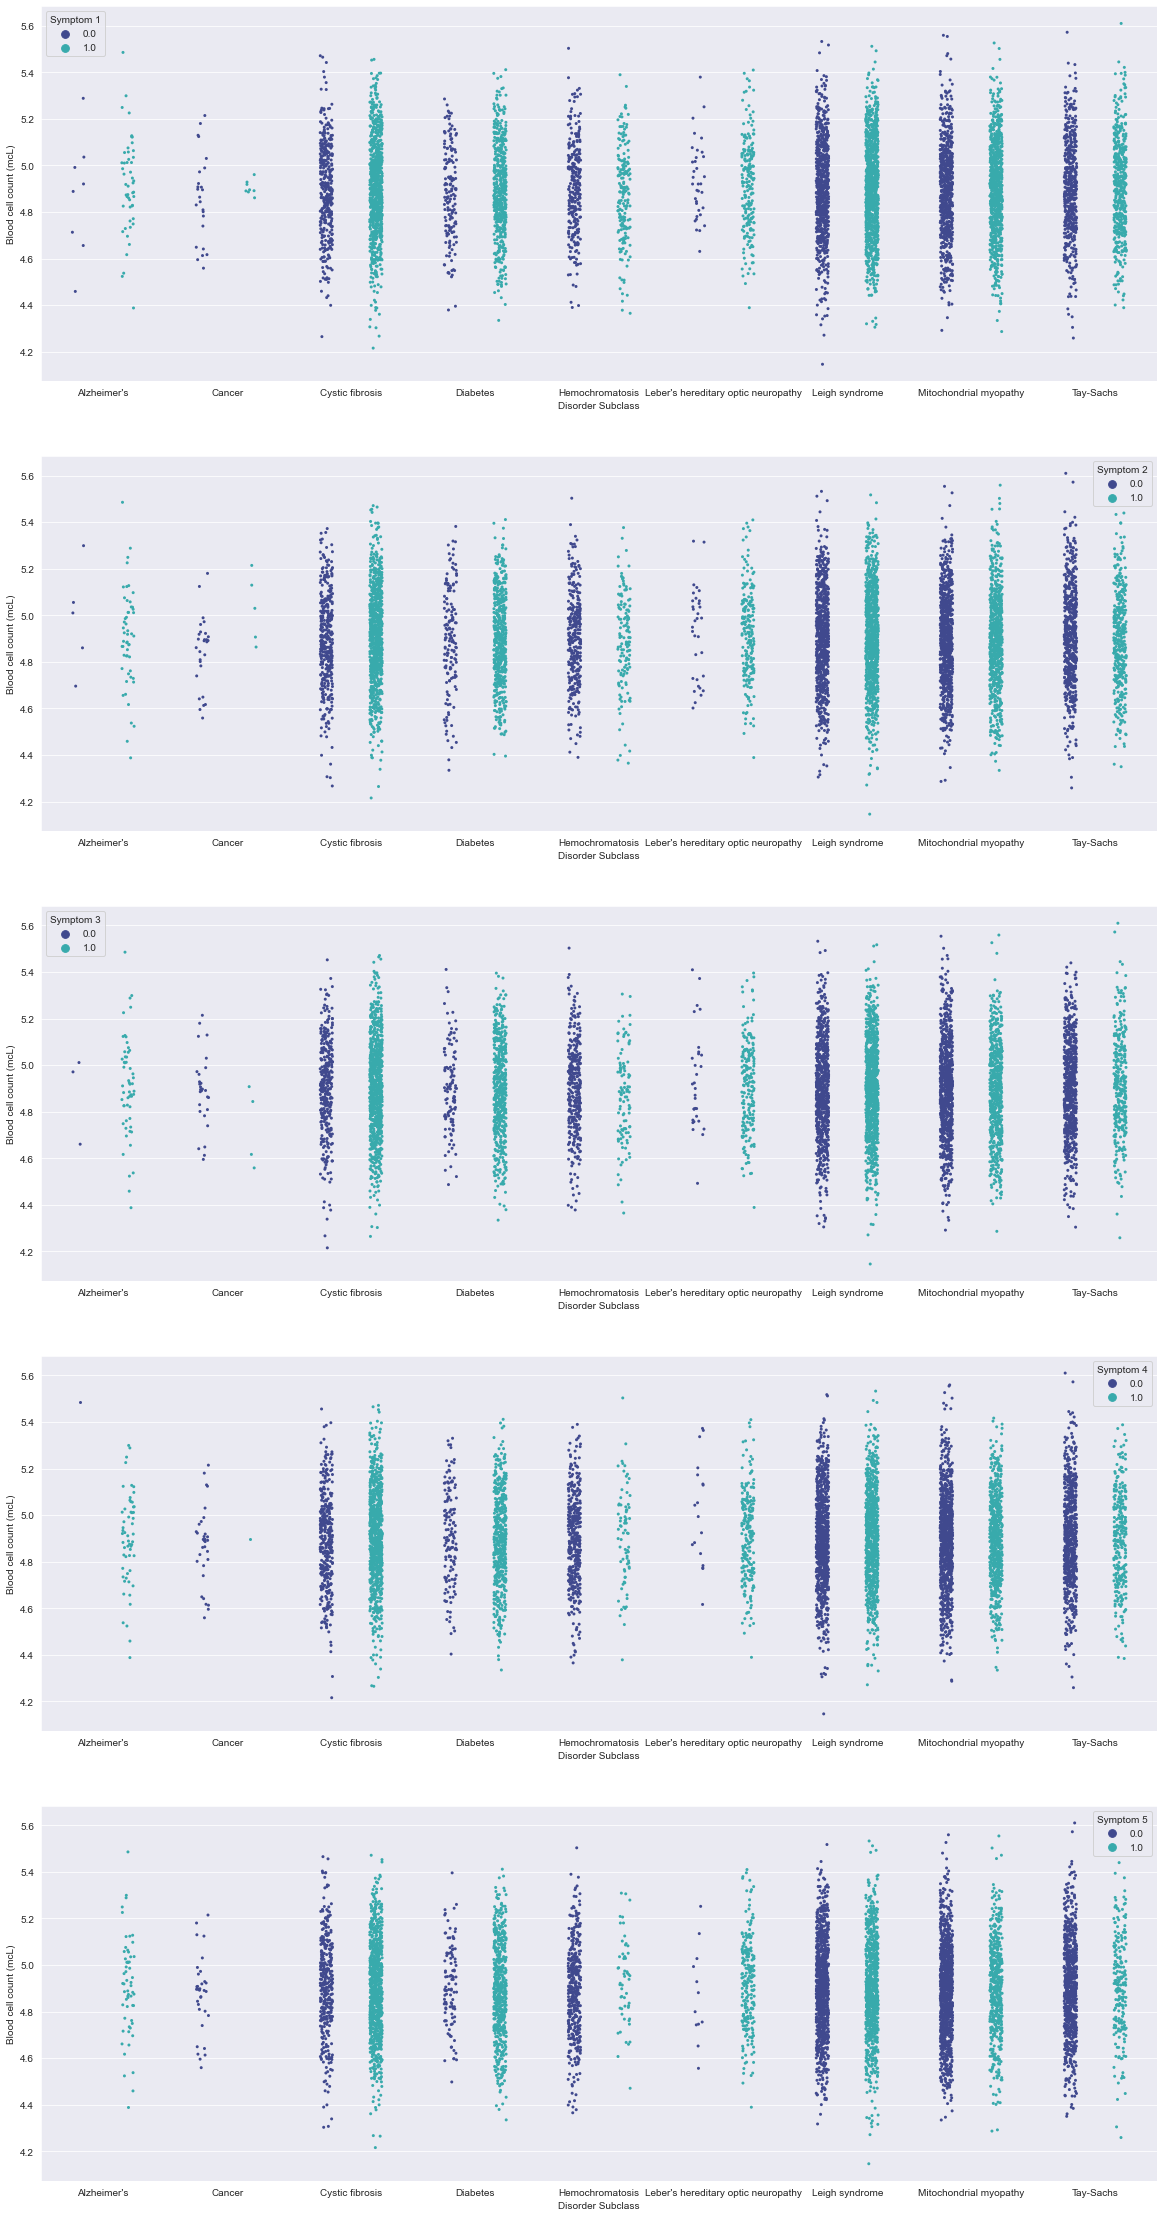

In [17]:
fig, axes = plt.subplots(5, 1, figsize = (20, 40), sharey = True)
sns.set_style('darkgrid')

sns.stripplot(
    x = 'Disorder Subclass', y = 'Blood cell count (mcL)', 
    data = df, palette = 'mako',
    jitter = True, hue = 'Symptom 1', 
    dodge = True, ax = axes[0], size = 3
)

sns.stripplot(
    x = 'Disorder Subclass', y = 'Blood cell count (mcL)', 
    data=df, palette = 'mako',
    jitter = True, hue = 'Symptom 2',
    dodge = True, ax = axes[1], size = 3
)

sns.stripplot(
    x = 'Disorder Subclass', y = 'Blood cell count (mcL)', 
    data=df, palette = 'mako',
    jitter = True, hue = 'Symptom 3', 
    dodge = True, ax = axes[2], size = 3
)

sns.stripplot(
    x = 'Disorder Subclass', y = 'Blood cell count (mcL)',
    data = df, palette = 'mako',
    jitter = True, hue = 'Symptom 4', 
    dodge = True, ax = axes[3], size = 3
)

sns.stripplot(
    x = 'Disorder Subclass', y = 'Blood cell count (mcL)', 
    data=df, palette = 'mako',
    jitter = True, hue = 'Symptom 5', 
    dodge = True, ax = axes[4], size = 3
)

<AxesSubplot:xlabel='Disorder Subclass', ylabel='Blood cell count (mcL)'>

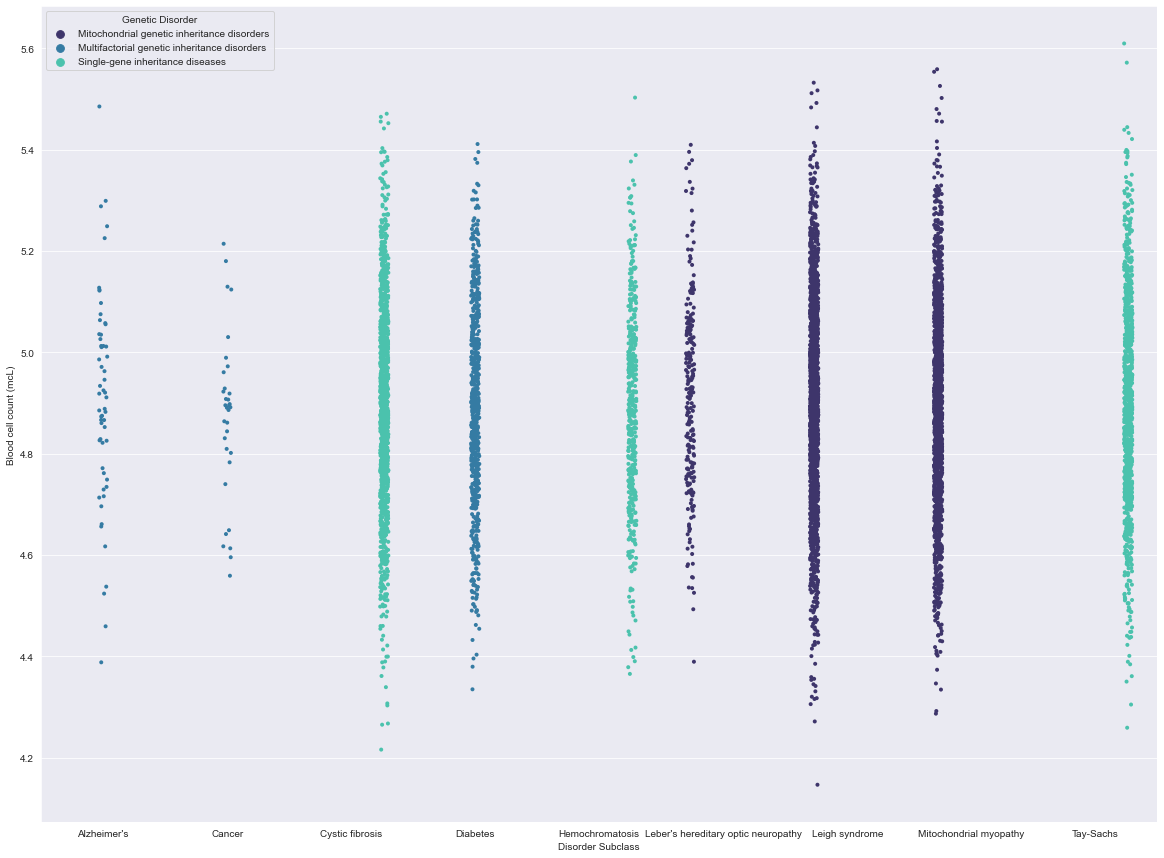

In [18]:
plt.figure(figsize=(20,15))
sns.stripplot(
    x = 'Disorder Subclass', y = 'Blood cell count (mcL)', 
    data = df, palette = 'mako',
    jitter = True, hue = 'Genetic Disorder', 
    dodge = True, size = 4
)

<AxesSubplot:xlabel='Blood cell count (mcL)', ylabel='Disorder Subclass'>

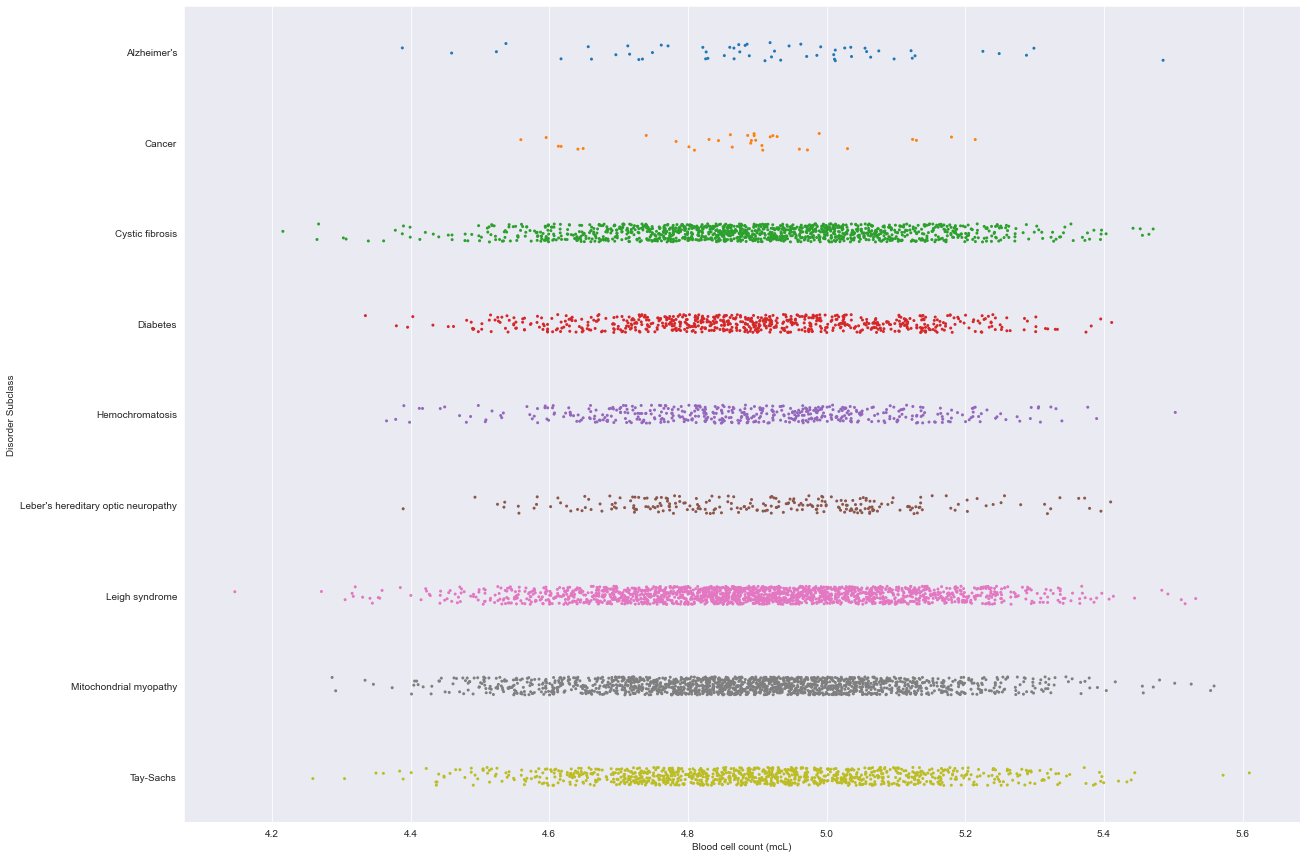

In [19]:
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')

sns.stripplot(
    x = 'Blood cell count (mcL)', y = 'Disorder Subclass', 
    data = df, size = 3
)

Working with categorical data

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in df:
    if df[i].dtype.name == 'category':
        df[i] = label_encoder.fit_transform(df[i])
df_cat = df.nunique()

for column_name in df:
    if 1 < df_cat[column_name] <= 9:
        df[column_name] = df[column_name].astype('category')

Modeling of data for Genetic Disorder

In [21]:
y = df['Genetic Disorder']
df_1 = df.drop(['Genetic Disorder'], axis = 1)
X = df_1

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 0, stratify = y)

In [23]:
params = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, params, cv = 5)
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)

print('Accuracy of predicting model:', knn_cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Accuracy of predicting model: 0.7946679139382601
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1090
           1       0.53      0.34      0.41       228
           2       0.77      0.67      0.72       820

    accuracy                           0.79      2138
   macro avg       0.71      0.66      0.68      2138
weighted avg       0.78      0.79      0.78      2138



Modeling of data for Disorder Subclass

In [24]:
y = df['Disorder Subclass']
df_2 = df.drop(['Disorder Subclass'], axis = 1)
X = df_2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, 
    random_state = 0, stratify = y
)

rfc = RandomForestClassifier()
param = {'max_depth': [2, 4, 6, 8, 10, 12],
        'n_estimators': [100, 200, 300],
        'min_samples_leaf': [2, 4, 6, 8]}
rfc_cv = GridSearchCV(rfc, param, cv = 5)
rfc_cv.fit(X_train, y_train)
y_pred = rfc_cv.predict(X_test)
print('Accuracy of predicting model:', rfc_cv.score(X_test, y_test))

Accuracy of predicting model: 0.725444340505145
